In [1]:
# Section 2.1.4

import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np
from io import StringIO

# Sample data from the user's table in text format for demonstration purposes.
# Normally, you would load this data directly from a .csv or Excel file.

data_text = """
Student_#	Flashcard_# 	Creator	relevance	exact	understandable	useful
17602327	1	20641797	5	3	4	4
17602327	2	AI	5	5	5	3
17602327	3	22729123	4	5	5	5
17602327	4	19874627	5	6	6	6
17602327	5	AI	6	5	5	3
17602327	6	AI	4	4	3	2
17602327	7	13925557	5	5	6	5
17602327	8	23743404	5	5	4	4
23744927	1	20641797	4	5	2	2
23744927	2	AI	4	4	5	4
23744927	3	22729123	5	5	4	4
23744927	4	19874627	5	5	5	5
23744927	5	AI	5	5	5	4
23744927	6	AI	4	4	5	3
23744927	7	13925557	5	6	6	5
23744927	8	23743404	5	4	5	5

"""

# We're using StringIO to simulate a file - this allows us to read the string as if it were a file.
data = StringIO(data_text)

# Read the data into a pandas DataFrame.
# We're specifying a tab delimiter because the data appears to be tab-separated.
df = pd.read_csv(data, sep="\t")


# Let's convert the 'Creator' column to a binary indicator: 1 for AI, 0 for Student
# This assumes that any entry that is not 'AI' is a student.
# If there are multiple student identifiers that are not simply 'Student', you'd need a more complex conversion.
df["Is_AI_Created"] = (df["Creator"] == "AI").astype(int)

# Split the dataframe into AI and Student flashcards for each criterion
ai_group_section_2_1_4 = df[df["Is_AI_Created"] == 1]
student_group_section_2_1_4 = df[df["Is_AI_Created"] == 0]

# Running Mann-Whitney U test for each criterion
# The test is run separately for 'relevance', 'exact', 'understandable', 'useful'
results = {
    criteria: mannwhitneyu(
        ai_group_section_2_1_4[criteria],
        student_group_section_2_1_4[criteria],
        alternative="two-sided",
    )
    for criteria in ["relevance", "exact", "understandable", "useful"]
}

alpha = 0.05
section_name = "Section 2.1.4"

# Count the number of unique 'Student_#' values
num_participants = df["Student_#"].nunique()

print(f"Number of participants in {section_name}: {num_participants}")

# Format the results to make them clearer
formatted_results = {
    section_name: {
        "number_of_participants": num_participants,
        "null_hypothesis": "The median scores for AI-created flashcards is equal to the median scores for student-created flashcards.",
        "results": {
            criteria: {
                "U_statistic": result.statistic,
                "p_value": result.pvalue,
                "significant": "Yes" if result.pvalue < alpha else "No",
            }
            for criteria, result in results.items()
        },
    }
}

# Print the formatted results
for section, data in formatted_results.items():
    print(f"Section: {section}")
    print(f"Number of participants: {data['number_of_participants']}")
    for criteria, result in data["results"].items():
        print(f"Criteria: {criteria}")
        print(f"U statistic: {result['U_statistic']}")
        print(f"P value: {result['p_value']}")
        print(f"Significant: {result['significant']}")
    print("\n")

Number of participants in Section 2.1.4: 2
Section: Section 2.1.4
Number of participants: 2
Criteria: relevance
U statistic: 25.0
P value: 0.5672694352671082
Significant: No
Criteria: exact
U statistic: 19.5
P value: 0.22737696938954344
Significant: No
Criteria: understandable
U statistic: 28.5
P value: 0.907143461495594
Significant: No
Criteria: useful
U statistic: 8.5
P value: 0.018418442963184
Significant: Yes




In [2]:
# Section 2.2

import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np
from io import StringIO

# Sample data from the user's table in text format for demonstration purposes.
# Normally, you would load this data directly from a .csv or Excel file.

data_text = """
Student_#	Flashcard_# 	Creator	relevance	exact	understandable	useful
24454319	1	AI	6	5	5	5
24454319	2	11747680	6	5	4	4
24454319	3	16582540	6	5	3	4
24454319	4	AI	6	5	5	5
24454319	5	AI	6	6	6	6
24454319	6	19744887	6	5	3	4
	1	AI	6	6	6	6
	2	11747680	5	4	4	4
	3	16582540	5	4	4	4
	4	AI	5	5	4	3
	5	AI	5	3	4	3
	6	19744887	5	4	4	4

"""

# We're using StringIO to simulate a file - this allows us to read the string as if it were a file.
data = StringIO(data_text)

# Read the data into a pandas DataFrame.
# We're specifying a tab delimiter because the data appears to be tab-separated.
df = pd.read_csv(data, sep="\t")

# Let's convert the 'Creator' column to a binary indicator: 1 for AI, 0 for Student
# This assumes that any entry that is not 'AI' is a student.
# If there are multiple student identifiers that are not simply 'Student', you'd need a more complex conversion.
df["Is_AI_Created"] = (df["Creator"] == "AI").astype(int)

# Split the dataframe into AI and Student flashcards for each criterion
ai_group_section_2_2 = df[df["Is_AI_Created"] == 1]
student_group_section_2_2 = df[df["Is_AI_Created"] == 0]

# Running Mann-Whitney U test for each criterion
# The test is run separately for 'relevance', 'exact', 'understandable', 'useful'
results = {
    criteria: mannwhitneyu(
        ai_group_section_2_2[criteria],
        student_group_section_2_2[criteria],
        alternative="two-sided",
    )
    for criteria in ["relevance", "exact", "understandable", "useful"]
}

# Define alpha for significance level
alpha = 0.05
section_name = "Section 2.2"

# Count the number of unique 'Student_#' values
num_participants = df["Student_#"].nunique()

print(f"Number of participants in {section_name}: {num_participants}")

# Format the results to make them clearer
formatted_results = {
    section_name: {
        "number_of_participants": num_participants,
        "null_hypothesis": "The median scores for AI-created flashcards is equal to the median scores for student-created flashcards.",
        "results": {
            criteria: {
                "U_statistic": result.statistic,
                "p_value": result.pvalue,
                "significant": "Yes" if result.pvalue < alpha else "No",
            }
            for criteria, result in results.items()
        },
    }
}

# Print the formatted results
for section, data in formatted_results.items():
    print(f"Section: {section}")
    print(f"Number of participants: {data['number_of_participants']}")
    print(f"Null hypothesis: {data['null_hypothesis']}")
    for criteria, result in data["results"].items():
        print(f"Criteria: {criteria}")
        print(f"U statistic: {result['U_statistic']}")
        print(f"P value: {result['p_value']}")
        print(f"Significant: {result['significant']}")
    print("\n")

Number of participants in Section 2.2: 1
Section: Section 2.2
Number of participants: 1
Null hypothesis: The median scores for AI-created flashcards is equal to the median scores for student-created flashcards.
Criteria: relevance
U statistic: 21.0
P value: 0.6403735394530488
Significant: No
Criteria: exact
U statistic: 25.5
P value: 0.2268180436817162
Significant: No
Criteria: understandable
U statistic: 32.0
P value: 0.020262769386687446
Significant: Yes
Criteria: useful
U statistic: 24.0
P value: 0.34426365693253047
Significant: No




In [3]:
# Section 2.4.6


import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np
from io import StringIO

# Sample data from the user's table in text format for demonstration purposes.
# Normally, you would load this data directly from a .csv or Excel file.

data_text = """
Student_#	Flashcard_# 	Creator	relevance	exact	understandable	useful
19-915-017	1	177706169	6	5	5	5
19-915-017	2	22748610	5	4	2	1
19-915-017	3	AI	6	6	6	4
19-915-017	4	AI	6	6	6	4
19-915-017	5	19750462	6	6	6	6
19-915-017	6	AI	6	6	5	4
21-741-079	1	177706169	6	4	3	5
21-741-079	2	22748610	2	3	2	3
21-741-079	3	AI	6	6	5	6
21-741-079	4	AI	6	6	6	6
21-741-079	5	19750462	4	2	3	3
21-741-079	6	AI	5	4	5	4
23-746-548	1	177706169	4	5	5	4
23-746-548	2	22748610	5	6	4	4
23-746-548	3	AI	4	5	5	6
23-746-548	4	AI	6	5	5	5
23-746-548	5	19750462	4	4	5	5
23-746-548	6	AI	5	4	3	3

"""

# We're using StringIO to simulate a file - this allows us to read the string as if it were a file.
data = StringIO(data_text)

# Read the data into a pandas DataFrame.
# We're specifying a tab delimiter because the data appears to be tab-separated.
df = pd.read_csv(data, sep="\t")

# Let's convert the 'Creator' column to a binary indicator: 1 for AI, 0 for Student
# This assumes that any entry that is not 'AI' is a student.
# If there are multiple student identifiers that are not simply 'Student', you'd need a more complex conversion.
df["Is_AI_Created"] = (df["Creator"] == "AI").astype(int)

# Split the dataframe into AI and Student flashcards for each criterion
ai_group_section_2_4_6 = df[df["Is_AI_Created"] == 1]
student_group_section_2_4_6 = df[df["Is_AI_Created"] == 0]

# Running Mann-Whitney U test for each criterion
# The test is run separately for 'relevance', 'exact', 'understandable', 'useful'
results = {
    criteria: mannwhitneyu(
        ai_group_section_2_4_6[criteria],
        student_group_section_2_4_6[criteria],
        alternative="two-sided",
    )
    for criteria in ["relevance", "exact", "understandable", "useful"]
}


alpha = 0.05

section_name = "Section 2.4.6"

# Count the number of unique 'Student_#' values
num_participants = df["Student_#"].nunique()

print(f"Number of participants in {section_name}: {num_participants}")

# Format the results to make them clearer
formatted_results = {
    section_name: {
        "number_of_participants": num_participants,
        "null_hypothesis": "The median scores for AI-created flashcards is equal to the median scores for student-created flashcards.",
        "results": {
            criteria: {
                "U_statistic": result.statistic,
                "p_value": result.pvalue,
                "significant": "Yes" if result.pvalue < alpha else "No",
            }
            for criteria, result in results.items()
        },
    }
}

# Print the formatted results
for section, data in formatted_results.items():
    print(f"Section: {section}")
    print(f"Number of participants: {data['number_of_participants']}")
    print(f"Null hypothesis: {data['null_hypothesis']}")
    for criteria, result in data["results"].items():
        print(f"Criteria: {criteria}")
        print(f"U statistic: {result['U_statistic']}")
        print(f"P value: {result['p_value']}")
        print(f"Significant: {result['significant']}")
    print("\n")

Number of participants in Section 2.4.6: 3
Section: Section 2.4.6
Number of participants: 3
Null hypothesis: The median scores for AI-created flashcards is equal to the median scores for student-created flashcards.
Criteria: relevance
U statistic: 57.5
P value: 0.11520679097249603
Significant: No
Criteria: exact
U statistic: 59.0
P value: 0.09590425284931184
Significant: No
Criteria: understandable
U statistic: 61.0
P value: 0.06234722530890134
Significant: No
Criteria: useful
U statistic: 50.0
P value: 0.41217180055535463
Significant: No




In [4]:
# Section 2.4.7

import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np
from io import StringIO

# Sample data from the user's table in text format for demonstration purposes.
# Normally, you would load this data directly from a .csv or Excel file.

data_text = """
Student_#	Flashcard_#	Creator	relevance	exact	understandable	useful
23-724-693	1	AI	5	5	5	4
23-724-693	2	23756299	3	3	4	2
23-724-693	3	21706932	5	5	5	5
23-724-693	4	AI	5	5	5	4
23-724-693	5	AI	5	5	5	4
23-724-693	6	18700294	5	4	5	4
21-724-968	1	AI	5	6	5	4
21-724-968	2	23756299	3	3	3	3
21-724-968	3	21706932	4	3	6	4
21-724-968	4	AI	6	4	5	6
21-724-968	5	AI	5	5	3	5
21-724-968	6	18700294	3	2	6	1
"""

# We're using StringIO to simulate a file - this allows us to read the string as if it were a file.
data = StringIO(data_text)

# Read the data into a pandas DataFrame.
# We're specifying a tab delimiter because the data appears to be tab-separated.
df = pd.read_csv(data, sep="\t")

# Let's convert the 'Creator' column to a binary indicator: 1 for AI, 0 for Student
# This assumes that any entry that is not 'AI' is a student.
# If there are multiple student identifiers that are not simply 'Student', you'd need a more complex conversion.
df["Is_AI_Created"] = (df["Creator"] == "AI").astype(int)

# Split the dataframe into AI and Student flashcards for each criterion
ai_group_section_2_4_7 = df[df["Is_AI_Created"] == 1]
student_group_section_2_4_7 = df[df["Is_AI_Created"] == 0]

# Running Mann-Whitney U test for each criterion
# The test is run separately for 'relevance', 'exact', 'understandable', 'useful'
results = {
    criteria: mannwhitneyu(
        ai_group_section_2_4_7[criteria],
        student_group_section_2_4_7[criteria],
        alternative="two-sided",
    )
    for criteria in ["relevance", "exact", "understandable", "useful"]
}

alpha = 0.05
section_name = "Section 2.4.7"

# Count the number of unique 'Student_#' values
num_participants = df["Student_#"].nunique()

print(f"Number of participants in {section_name}: {num_participants}")

# Format the results to make them clearer
formatted_results = {
    section_name: {
        "number_of_participants": num_participants,
        "null_hypothesis": "The median scores for AI-created flashcards is equal to the median scores for student-created flashcards.",
        "results": {
            criteria: {
                "U_statistic": result.statistic,
                "p_value": result.pvalue,
                "significant": "Yes" if result.pvalue < alpha else "No",
            }
            for criteria, result in results.items()
        },
    }
}

# Print the formatted results
for section, data in formatted_results.items():
    print(f"Section: {section}")
    print(f"Number of participants: {data['number_of_participants']}")
    print(f"Null hypothesis: {data['null_hypothesis']}")
    for criteria, result in data["results"].items():
        print(f"Criteria: {criteria}")
        print(f"U statistic: {result['U_statistic']}")
        print(f"P value: {result['p_value']}")
        print(f"Significant: {result['significant']}")
    print("\n")

Number of participants in Section 2.4.7: 2
Section: Section 2.4.7
Number of participants: 2
Null hypothesis: The median scores for AI-created flashcards is equal to the median scores for student-created flashcards.
Criteria: relevance
U statistic: 31.0
P value: 0.024342555154331813
Significant: Yes
Criteria: exact
U statistic: 32.5
P value: 0.01894024490788601
Significant: Yes
Criteria: understandable
U statistic: 15.5
P value: 0.7198307076577725
Significant: No
Criteria: useful
U statistic: 27.5
P value: 0.12321267577886381
Significant: No




In [5]:
# Section 2.4.8

import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np
from io import StringIO

# Sample data from the user's table in text format for demonstration purposes.
# Normally, you would load this data directly from a .csv or Excel file.

data_text = """
Student_#	Flashcard_# 	Creator	relevance	exact	understandable	useful
23-751-290	1	AI	4	2	4	2
23-751-290	2	AI	4	2	2	2
23-751-290	3	20752200	2	3	5	3
23-751-290	4	20924403	2	3	2	1
23-751-290	5	AI	5	5	5	5
23-751-290	6	20735445	3	3	4	4
23-751-290	7	21918149	3	2	3	2
23-751-290	8	20735908	4	4	5	5
20-187-837	1	AI	6	4	5	4
20-187-837	2	AI	5	4	4	4
20-187-837	3	20752200	2	2	1	2
20-187-837	4	20924403	4	4	4	4
20-187-837	5	AI	6	6	6	6
20-187-837	6	20735445	5	5	4	4
20-187-837	7	21918149	6	6	6	6
20-187-837	8	20735908	6	6	6	6

"""

# We're using StringIO to simulate a file - this allows us to read the string as if it were a file.
data = StringIO(data_text)

# Read the data into a pandas DataFrame.
# We're specifying a tab delimiter because the data appears to be tab-separated.
df = pd.read_csv(data, sep="\t")

# Let's convert the 'Creator' column to a binary indicator: 1 for AI, 0 for Student
# This assumes that any entry that is not 'AI' is a student.
# If there are multiple student identifiers that are not simply 'Student', you'd need a more complex conversion.
df["Is_AI_Created"] = (df["Creator"] == "AI").astype(int)

# Split the dataframe into AI and Student flashcards for each criterion
ai_group_section_2_4_8 = df[df["Is_AI_Created"] == 1]
student_group_section_2_4_8 = df[df["Is_AI_Created"] == 0]

# Running Mann-Whitney U test for each criterion
# The test is run separately for 'relevance', 'exact', 'understandable', 'useful'
results = {
    criteria: mannwhitneyu(
        ai_group_section_2_4_8[criteria],
        student_group_section_2_4_8[criteria],
        alternative="two-sided",
    )
    for criteria in ["relevance", "exact", "understandable", "useful"]
}

alpha = 0.05
section_name = "Section 2.4.8"

# Count the number of unique 'Student_#' values
num_participants = df["Student_#"].nunique()

print(f"Number of participants in {section_name}: {num_participants}")

# Format the results to make them clearer
formatted_results = {
    section_name: {
        "number_of_participants": num_participants,
        "null_hypothesis": "The median scores for AI-created flashcards is equal to the median scores for student-created flashcards.",
        "results": {
            criteria: {
                "U_statistic": result.statistic,
                "p_value": result.pvalue,
                "significant": "Yes" if result.pvalue < alpha else "No",
            }
            for criteria, result in results.items()
        },
    }
}

# Print the formatted results
for section, data in formatted_results.items():
    print(f"Section: {section}")
    print(f"Number of participants: {data['number_of_participants']}")
    print(f"Null hypothesis: {data['null_hypothesis']}")
    for criteria, result in data["results"].items():
        print(f"Criteria: {criteria}")
        print(f"U statistic: {result['U_statistic']}")
        print(f"P value: {result['p_value']}")
        print(f"Significant: {result['significant']}")
    print("\n")

Number of participants in Section 2.4.8: 2
Section: Section 2.4.8
Number of participants: 2
Null hypothesis: The median scores for AI-created flashcards is equal to the median scores for student-created flashcards.
Criteria: relevance
U statistic: 45.0
P value: 0.10796783678892491
Significant: No
Criteria: exact
U statistic: 30.5
P value: 1.0
Significant: No
Criteria: understandable
U statistic: 33.5
P value: 0.7382983443176347
Significant: No
Criteria: useful
U statistic: 31.5
P value: 0.911323575576961
Significant: No




In [6]:
# Section 2.4.9

import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np
from io import StringIO

# Sample data from the user's table in text format for demonstration purposes.
# Normally, you would load this data directly from a .csv or Excel file.

data_text = """
Student_#	Flashcard_# 	Creator	relevance	exact	understandable	useful
24454319	1	AI	6	6	5	4
24454319	2	21715610	6	5	5	5
24454319	3	13929476	6	5	5	4
24454319	4	23744597	6	4	3	4
24454319	5	AI	6	5	4	3
24454319	6	AI	6	5	4	4
23-754-328	1	AI	5	3	3	3
23-754-328	2	21715610	4	3	5	3
23-754-328	3	13929476	5	5	5	4
23-754-328	4	23744597	4	5	3	4
23-754-328	5	AI	3	4	3	2
23-754-328	6	AI	5	4	4	4

"""

# We're using StringIO to simulate a file - this allows us to read the string as if it were a file.
data = StringIO(data_text)

# Read the data into a pandas DataFrame.
# We're specifying a tab delimiter because the data appears to be tab-separated.
df = pd.read_csv(data, sep="\t")

# Let's convert the 'Creator' column to a binary indicator: 1 for AI, 0 for Student
# This assumes that any entry that is not 'AI' is a student.
# If there are multiple student identifiers that are not simply 'Student', you'd need a more complex conversion.
df["Is_AI_Created"] = (df["Creator"] == "AI").astype(int)

# Split the dataframe into AI and Student flashcards for each criterion
ai_group_section_2_4_9 = df[df["Is_AI_Created"] == 1]
student_group_section_2_4_9 = df[df["Is_AI_Created"] == 0]

# Running Mann-Whitney U test for each criterion
# The test is run separately for 'relevance', 'exact', 'understandable', 'useful'
results = {
    criteria: mannwhitneyu(
        ai_group_section_2_4_9[criteria],
        student_group_section_2_4_9[criteria],
        alternative="two-sided",
    )
    for criteria in ["relevance", "exact", "understandable", "useful"]
}

alpha = 0.05
section_name = "Section 2.4.9"

# Count the number of unique 'Student_#' values
num_participants = df["Student_#"].nunique()

print(f"Number of participants in {section_name}: {num_participants}")

# Format the results to make them clearer
formatted_results = {
    section_name: {
        "number_of_participants": num_participants,
        "null_hypothesis": "The median scores for AI-created flashcards is equal to the median scores for student-created flashcards.",
        "results": {
            criteria: {
                "U_statistic": result.statistic,
                "p_value": result.pvalue,
                "significant": "Yes" if result.pvalue < alpha else "No",
            }
            for criteria, result in results.items()
        },
    }
}

# Print the formatted results
for section, data in formatted_results.items():
    print(f"Section: {section}")
    print(f"Number of participants: {data['number_of_participants']}")
    print(f"Null hypothesis: {data['null_hypothesis']}")
    for criteria, result in data["results"].items():
        print(f"Criteria: {criteria}")
        print(f"U statistic: {result['U_statistic']}")
        print(f"P value: {result['p_value']}")
        print(f"Significant: {result['significant']}")
    print("\n")

Number of participants in Section 2.4.9: 2
Section: Section 2.4.9
Number of participants: 2
Null hypothesis: The median scores for AI-created flashcards is equal to the median scores for student-created flashcards.
Criteria: relevance
U statistic: 18.5
P value: 1.0
Significant: No
Criteria: exact
U statistic: 17.5
P value: 1.0
Significant: No
Criteria: understandable
U statistic: 12.0
P value: 0.34812198781260406
Significant: No
Criteria: useful
U statistic: 10.0
P value: 0.1766930332990293
Significant: No




Combined Results:
Criteria: relevance
U statistic: 1208.5
P value: 0.007935259998089205
Significant: Yes
AI Mean Rank: 50.98717948717949
Student Mean Rank: 37.287234042553195


Criteria: exact
U statistic: 1133.5
P value: 0.050876466077359704
Significant: No
AI Mean Rank: 49.06410256410256
Student Mean Rank: 38.88297872340426


Criteria: understandable
U statistic: 1079.0
P value: 0.1427993323332307
Significant: No
AI Mean Rank: 47.666666666666664
Student Mean Rank: 40.04255319148936


Criteria: useful
U statistic: 928.5
P value: 0.9171602327711257
Significant: No
AI Mean Rank: 43.80769230769231
Student Mean Rank: 43.244680851063826




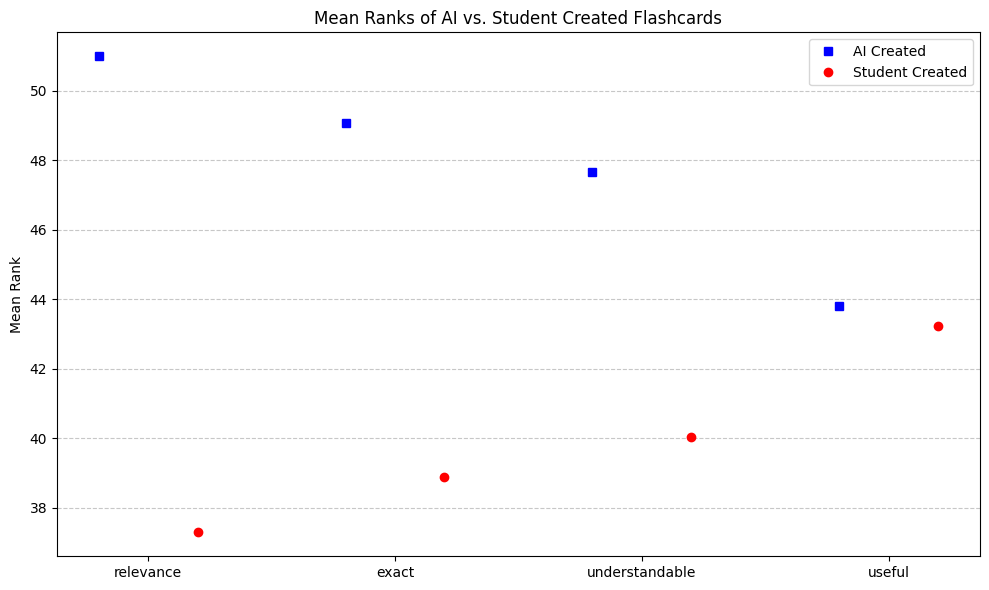

In [10]:
ai_combined = pd.concat(
    [
        ai_group_section_2_1_4,
        ai_group_section_2_2,
        ai_group_section_2_4_6,
        ai_group_section_2_4_7,
        ai_group_section_2_4_8,
        ai_group_section_2_4_9,
    ]
)
student_combined = pd.concat(
    [
        student_group_section_2_1_4,
        student_group_section_2_2,
        student_group_section_2_4_6,
        student_group_section_2_4_7,
        student_group_section_2_4_8,
        student_group_section_2_4_9,
    ]
)


# Assuming ai_combined and student_combined are already defined as in your setup

# Now we run the Mann-Whitney U test for each criterion using the combined groups and calculate ranks.
criteria = ["relevance", "exact", "understandable", "useful"]
combined_results = {}
for criterion in criteria:
    # Combine the AI and student groups for this criterion
    combined_for_criterion = pd.concat(
        [ai_combined[[criterion]], student_combined[[criterion]]], ignore_index=True
    )
    combined_for_criterion["group"] = ["AI"] * len(ai_combined) + ["Student"] * len(
        student_combined
    )

    # Now perform the Mann-Whitney U test
    result = mannwhitneyu(
        ai_combined[criterion], student_combined[criterion], alternative="two-sided"
    )

    # Calculate ranks across the combined dataset for accurate comparison
    combined_for_criterion["rank"] = combined_for_criterion[criterion].rank()
    ai_rank_mean = combined_for_criterion[combined_for_criterion["group"] == "AI"][
        "rank"
    ].mean()
    student_rank_mean = combined_for_criterion[
        combined_for_criterion["group"] == "Student"
    ]["rank"].mean()

    combined_results[criterion] = {
        "U_statistic": result.statistic,
        "p_value": result.pvalue,
        "significant": "Yes" if result.pvalue < 0.05 else "No",
        "ai_rank_mean": ai_rank_mean,
        "student_rank_mean": student_rank_mean,
    }

# Print the combined results
print("Combined Results:")
for criterion, result in combined_results.items():
    print(f"Criteria: {criterion}")
    print(f"U statistic: {result['U_statistic']}")
    print(f"P value: {result['p_value']}")
    print(f"Significant: {result['significant']}")
    print(f"AI Mean Rank: {result['ai_rank_mean']}")
    print(f"Student Mean Rank: {result['student_rank_mean']}")
    print("\n")

import matplotlib.pyplot as plt
import numpy as np

ai_mean_ranks = [50.99, 49.06, 47.67, 43.81]
student_mean_ranks = [37.29, 38.88, 40.04, 43.24]

fig, ax = plt.subplots(figsize=(10, 6))
positions = np.arange(len(criteria)) * 2  # Positions for the groups

# Create box plots for AI and Student mean ranks
# Note: We don't have the individual data points to create a true box plot,
# so we'll plot the mean ranks as lines for illustration purposes.
ax.plot(positions - 0.4, ai_mean_ranks, "s", label="AI Created", color="blue")
ax.plot(positions + 0.4, student_mean_ranks, "o", label="Student Created", color="red")

# Improve the plot
ax.set_xticks(positions)
ax.set_xticklabels(criteria)
ax.set_ylabel("Mean Rank")
ax.set_title("Mean Ranks of AI vs. Student Created Flashcards")
ax.legend()

plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.power import TTestIndPower

# settings for the analysis
effect_size = 0.5  # medium effect size
alpha = 0.05  # significance level
power = 0.8  # desired power

# create an instance of the power analysis class
analysis = TTestIndPower()

# calculate the sample size
sample_size = analysis.solve_power(
    effect_size=effect_size,
    power=power,
    alpha=alpha,
    ratio=1.0,
    alternative="two-sided",
)
print(f"Sample size required (per group): {sample_size:.2f}")

Sample size required (per group): 63.77
